<a href="https://colab.research.google.com/github/karthichanceux/numpy-task/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [4]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [5]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [6]:
df.duplicated().value_counts()

False    15
dtype: int64

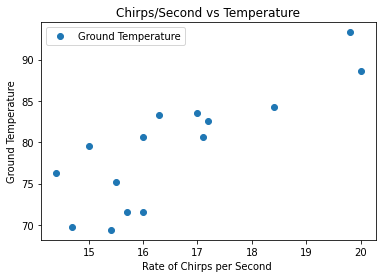

In [7]:
# plotting the data 
df.plot(x = 'Chirps/Second', y = 'Ground Temperature',style = 'o')
plt.title('Chirps/Second vs Temperature')
plt.xlabel('Rate of Chirps per Second ')
plt.ylabel('Ground Temperature')
plt.show()

In [8]:
# checking correlation
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [9]:
x = df[['Ground Temperature']].values
y = df['Chirps/Second']

In [10]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [11]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(x)
# x = scaler.transform(x)

In [ ]:
Task 1

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [14]:
print('Coefficient :',model.coef_,'\nIntercept :',model.intercept_)

Coefficient : [0.20299973] 
Intercept : 0.45931464523595267


In [15]:
print(f"Equation : y = {model.coef_} * x + {model.intercept_}" )

Equation : y = [0.20299973] * x + 0.45931464523595267


In [ ]:
Task 2

In [16]:
y_pred = model.predict(x)
pd.DataFrame({'Actual':y,"Predicted":y_pred})

,Actual,Predicted
0,20.0,18.445091
1,16.0,14.994095
2,19.8,19.399190
3,18.4,17.572192
4,17.1,16.821093
5,15.5,15.724894
6,14.7,14.608396
7,15.7,14.994095
8,15.4,14.547496
9,16.3,17.369192


In [ ]:
Task 3


In [17]:
print("Score : ",model.score(x,y))

Score :  0.6922946529146998


In [ ]:
Task 4

In [18]:
print('Rate of chirps/sec at ground temperature 95ºF :',model.predict([[95]]))

Rate of chirps/sec at ground temperature 95ºF : [19.74428913]


In [ ]:
Task 5

In [19]:
print('Ground temperature when the rate of chirps/sec is 18 :',(18 - model.intercept_)/model.coef_)

Ground temperature when the rate of chirps/sec is 18 : [86.40743135]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [20]:
df1 = pd.read_fwf("brain_body.txt")

In [21]:
df1.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [23]:
df1.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df1.duplicated().sum()

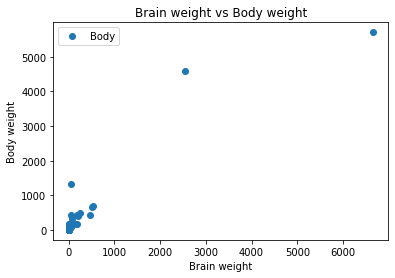

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [25]:
df1.plot(x='Brain', y='Body', style='o')
plt.title('Brain weight vs Body weight')
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.show()
df1.corr()

In [27]:
# find 25 percentile and 75 percentile of brain
brain_percent_25 = df1['Brain'].quantile(0.25)
brain_percent_75 = df1['Brain'].quantile(0.75)
print(brain_percent_25,brain_percent_75)

0.6000000000000001 48.2025


In [28]:
#finding uper limit and lower limit of brian
iqr = brain_percent_75 - brain_percent_25
upper_limit = brain_percent_75 + iqr * 1.5
lower_limit = brain_percent_25 - iqr * 1.5
print(upper_limit,lower_limit)

119.60625 -70.80375000000001


In [ ]:
# capping
 df1['Brain'].iloc[df1['Brain'] > upper_limit] = upper_limit

In [30]:
df1[df1['Brain'] == upper_limit]

,Brain,Body


In [31]:
# find 25 percentile and 75 percentile of body
body_percent_25 = df1['Body'].quantile(0.25)
body_percent_75 = df1['Body'].quantile(0.75)
print(body_percent_25,body_percent_75)

4.25 166.0


In [32]:
#finding uper limit and lower limit 
iqr = body_percent_75 - body_percent_25
upper_limit = body_percent_75 + iqr * 1.5
lower_limit = body_percent_25 - iqr * 1.5
print(upper_limit,lower_limit)

408.625 -238.375


In [ ]:
#capping
 df1['Body'].iloc[df1['Body'] > upper_limit] = upper_limit
 

In [33]:
df1[df1['Body'] == upper_limit]

,Brain,Body


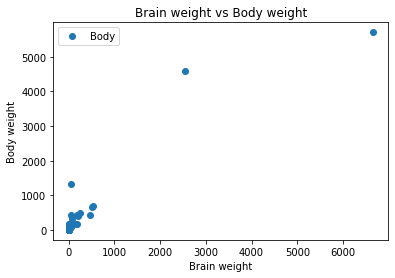

In [34]:
df1.plot(x='Brain', y='Body', style='o')
plt.title('Brain weight vs Body weight')
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.show()

In [35]:
df1.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [36]:
x = df1.iloc[: , [0]]
y = df1.iloc[: , 1]

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [38]:
x_train.shape, x_test.shape

((49, 1), (13, 1))

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

In [ ]:
Task 1

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [40]:
print("Coefficient : ",model.coef_,"\nIntercept : ",model.intercept_)

Coefficient :  [1.72900033] 
Intercept :  31.42610138779719


In [41]:
print(f"Equation : y = {model.coef_} * x + {model.intercept_}")

Equation : y = [1.72900033] * x + 31.42610138779719


In [ ]:
Task 2

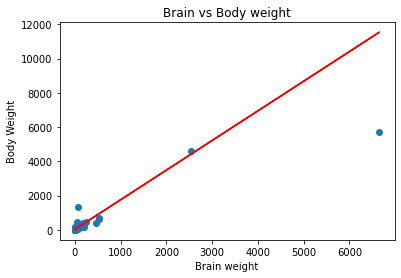

In [42]:
plt.scatter(x, y)
plt.plot(x_test,model.predict(x_test),color='red')
plt.title('Brain vs Body weight')
plt.xlabel('Brain weight')
plt.ylabel('Body Weight')
plt.show()

In [ ]:
Task 3

In [43]:
print('Score :',model.score(x_test,y_test))

Score : -0.15420914171669442


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [44]:
df2 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])


In [45]:
df2.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [47]:
df2.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


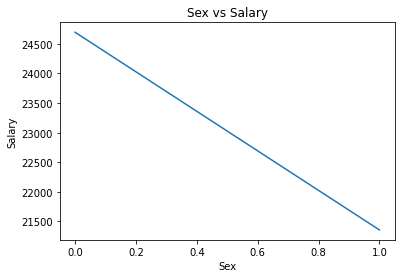

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [49]:
# df2.plot(x = 'Sex', y = 'Salary',style = 'o')
df2.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.ylabel('Salary')
plt.show()
df2[['Sex','Salary']].corr()

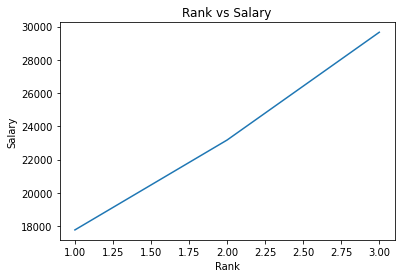

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [50]:
df2.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.ylabel('Salary')
plt.show()
df2[['Rank','Salary']].corr()

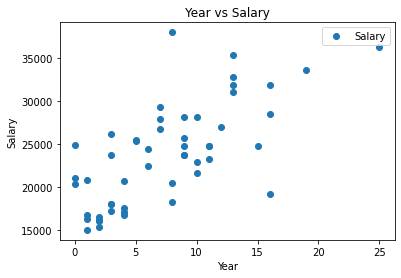

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [51]:
df2.plot(x = 'Year', y = 'Salary',style = 'o')
plt.title('Year vs Salary')
plt.ylabel('Salary')
plt.show()
df2[['Year','Salary']].corr()

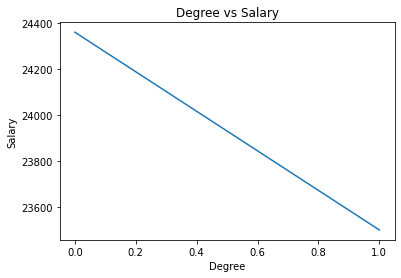

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [52]:
df2.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.ylabel('Salary')
plt.show()
df2[['Degree','Salary']].corr()

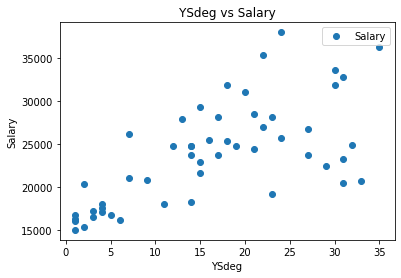

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [53]:
df2.plot(x = 'YSdeg', y = 'Salary',style = 'o')
plt.title('YSdeg vs Salary')
plt.ylabel('Salary')
plt.show()
df2[['YSdeg','Salary']].corr()

In [54]:
x = df2.iloc[: , :-1]
y = df2.iloc[: , -1]

In [55]:
# splitting the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [56]:
x_train.shape, x_test.shape

((39, 5), (13, 5))

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
Task 1

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [58]:
print("Intercept :",model.intercept_)

Intercept : 9700.944520481282


In [59]:
pd.DataFrame(model.coef_,["Sex", "Rank", "Year", "Degree", "YSdeg"],columns = ['Coefficients'])

,Coefficients
Sex,1003.697466
Rank,5387.599411
Year,437.957184
Degree,275.091229
YSdeg,-45.667381


In [60]:
model.score(x_test,y_test)

0.6795042183867245

In [61]:
print("Equation : y =",end ='')
for i in range(0,5):
   print(f"({model.coef_[i]}) * x{i+1} + ", end = '')
print(model.intercept_)

Equation : y =(1003.6974659617696) * x1 + (5387.599411022547) * x2 + (437.9571836257828) * x3 + (275.0912291219613) * x4 + (-45.66738067494862) * x5 + 9700.944520481282


In [ ]:
Task 2

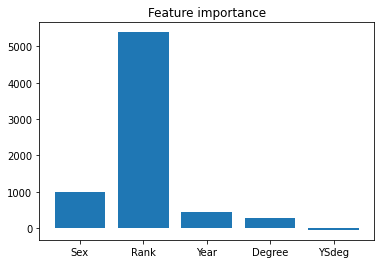

,Coefficients
Sex,1003.697466
Rank,5387.599411
Year,437.957184
Degree,275.091229
YSdeg,-45.667381


In [62]:
importance = model.coef_
plt.bar(x = ["Sex", "Rank", "Year", "Degree", "YSdeg"] , height = importance)
plt.title('Feature importance')
plt.show()
pd.DataFrame(model.coef_,["Sex", "Rank", "Year", "Degree", "YSdeg"],columns = ['Coefficients'])

In [63]:
#getting all the combinations of the columns
from itertools import combinations

cols = ["Sex", "Rank", "Year", "Degree", "YSdeg"]
combos = list(combinations(cols,x+1) for x in range(len(cols)))

In [64]:
# training and getting R2 score of all the columns
score_dict = {}
for i in range(len(combos)):
  for j in combos[i]:
    x = df2[list(j)]
    y = df2['Salary']
    LR = LinearRegression()
    LR.fit(x,y)
    score_dict[j] = LR.score(x,y)

In [65]:
# descending order of R2 scores
sorted(score_dict.items(), key = lambda i:i [1], reverse = True)

[(('Sex', 'Rank', 'Year', 'Degree', 'YSdeg'), 0.8547180674410969),
 (('Sex', 'Rank', 'Year', 'YSdeg'), 0.8490366192262851),
 (('Rank', 'Year', 'Degree', 'YSdeg'), 0.8485077204335426),
 (('Rank', 'Year', 'YSdeg'), 0.8456725764485596),
 (('Sex', 'Rank', 'Year', 'Degree'), 0.845547641297936),
 (('Sex', 'Rank', 'Year'), 0.8454319861987166),
 (('Rank', 'Year', 'Degree'), 0.8437395200874137),
 (('Rank', 'Year'), 0.8436480933264597),
 (('Sex', 'Rank', 'Degree', 'YSdeg'), 0.7671813414350668),
 (('Sex', 'Rank', 'YSdeg'), 0.7666122610227071),
 (('Rank', 'Degree', 'YSdeg'), 0.7625149185326454),
 (('Rank', 'YSdeg'), 0.7623948189698249),
 (('Sex', 'Rank', 'Degree'), 0.7583144768153613),
 (('Rank', 'Degree'), 0.7557961688386643),
 (('Sex', 'Rank'), 0.7554917749443394),
 (('Rank',), 0.7525360539274633),
 (('Sex', 'Year', 'Degree', 'YSdeg'), 0.6311597502907436),
 (('Year', 'Degree', 'YSdeg'), 0.6236261611533503),
 (('Sex', 'Degree', 'YSdeg'), 0.5832708257660315),
 (('Sex', 'Year', 'YSdeg'), 0.58080639

In [ ]:
TASK3

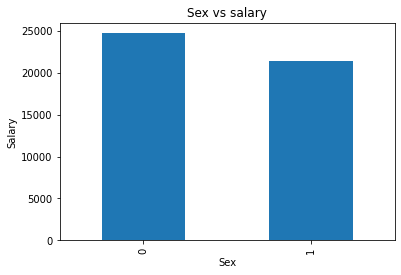

In [66]:
df2.groupby('Sex')['Salary'].mean().plot(kind='bar')
plt.ylabel('Salary')
plt.title('Sex vs salary')
plt.show()

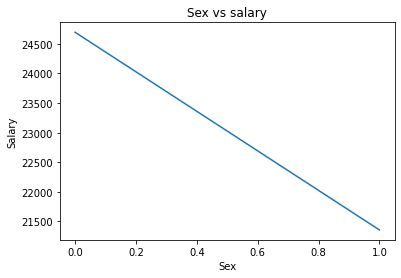

In [67]:
df2.groupby('Sex')['Salary'].mean().plot()
plt.ylabel('Salary')
plt.title('Sex vs salary')
plt.show()

In [68]:
df2[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000
